In [1]:
# start a spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("ALS100").getOrCreate()

24/04/28 13:37:42 WARN Utils: Your hostname, ZOU.local resolves to a loopback address: 127.0.0.1; using 100.72.44.48 instead (on interface en0)
24/04/28 13:37:42 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/04/28 13:37:42 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
# set the log level to ERROR
spark.sparkContext.setLogLevel("ERROR")

In [3]:
import pandas as pd
best_predictions_10_pd = pd.read_parquet("/Users/ZOU/best_predictions_10.parquet")
best_predictions_20_pd = pd.read_parquet("/Users/ZOU/best_predictions_20.parquet")
best_predictions_50_pd = pd.read_parquet("/Users/ZOU/best_predictions_50.parquet")
best_predictions_80_pd = pd.read_parquet("/Users/ZOU/best_predictions_80.parquet")
best_predictions_100_pd = pd.read_parquet("/Users/ZOU/best_predictions_100_probability.parquet")

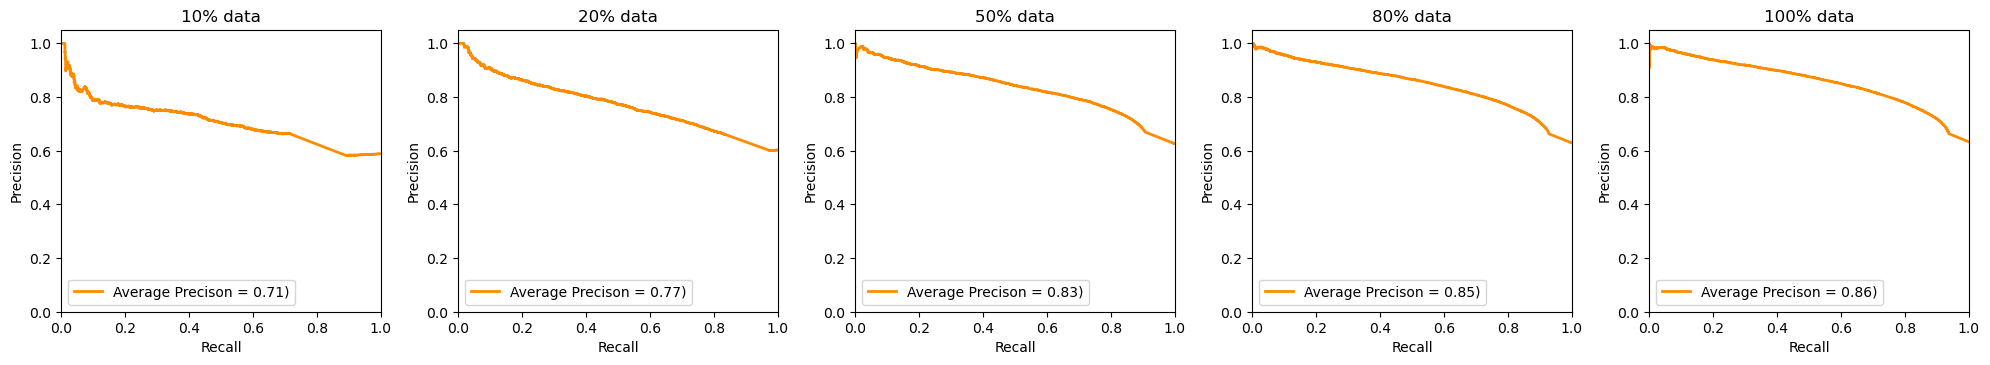

In [7]:
# draw the precision-recall curve
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

precentages = [10, 20, 50, 80, 100]
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
#fig.suptitle('ALS Precision-Recall Curves', fontsize=16)
for i, df in enumerate([best_predictions_10_pd, best_predictions_20_pd, best_predictions_50_pd, best_predictions_80_pd, best_predictions_100_pd]):
    precision, recall, _ = precision_recall_curve(df["rating_binary"], df["probability"])
    auc_score_pr = auc(recall, precision)
    # Plot the curve on the ith subplot
    axes[i].plot(recall, precision, color='darkorange', lw=2, label=f'Average Precison = {auc_score_pr:.2f})')
    axes[i].set_xlim([0.0, 1.0])
    axes[i].set_ylim([0.0, 1.05])
    axes[i].set_xlabel('Recall')
    axes[i].set_ylabel('Precision')
    percentage = precentages[i]
    axes[i].set_title(f'{percentage}% data')
    axes[i].legend(loc="lower left")

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

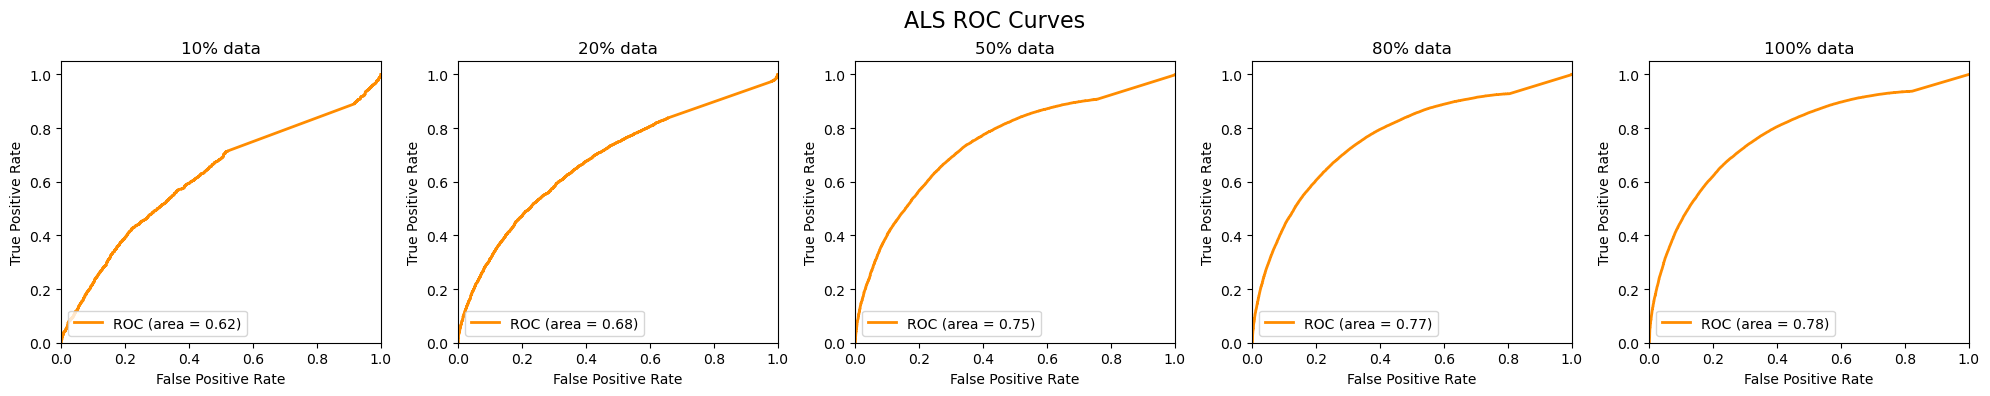

In [6]:
# draw the ROC curve
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
fig.suptitle('ALS ROC Curves', fontsize=16)
for i, df in enumerate([best_predictions_10_pd, best_predictions_20_pd, best_predictions_50_pd, best_predictions_80_pd, best_predictions_100_pd]):
    fpr, tpr, _ = roc_curve(df["rating_binary"], df["probability"])
    auc_score_roc = auc(fpr, tpr)
    # Plot the curve on the ith subplot
    axes[i].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (area = {auc_score_roc:.2f})')
    axes[i].set_xlim([0.0, 1.0])
    axes[i].set_ylim([0.0, 1.05])
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    percentage = precentages[i]
    axes[i].set_title(f'{percentage}% data')
    axes[i].legend(loc="lower left")

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()